## Seminario :: Analisi statistica spaziale di alcune proprietà dei suoli

### Laurea magistrale in scienze forestali ed ambientali
### Corso di Geografia e Valutazione del suolo

Giuliano Langella<br>
[glangella@unina.it]

#### ––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––

### Step #2: Esempio applicativo, analisi spaziale dell'andicità

#### ––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––––

### Premessa

#### Ordinary kriging (OK)
The random field (RF) $\mathbf{Z}(\mathbf{u})$ is assumed to be intrinsic second‐order stationary if the first two moments (i.e. mean $\mathit{m}$ and semivariance $\gamma(\mathbf{h})$) of the two‐point RF increments exist and are invariant under translation and rotation within a bounded area $\mathfrak{D}$ (Goovaerts1997_book, Wackernagel2003_book):

\begin{eqnarray}
m &=& E \{ Z(\mathbf{u}) \} \nonumber\\
\gamma(\mathbf{h}) &=& \frac{1}{2}E\left\lbrace\left[ Z\left( \mathbf{u} \right) - Z\left( \mathbf{u}+\mathbf{h} \right) \right]^2 \right\rbrace
\end{eqnarray}

with theoretically infinite points locations ${u}(\mathbf{x})\in\mathfrak{D}$, and random variables (RV) $Z(\mathbf{u})$ and $Z(\mathbf{u}+\mathbf{h})$ separated by the distance vector $h(\mathbf{x})$, where $\textbf{x}$ represents the coordinates $(\mathbf{x}_1,\mathbf{x}_2,\mathbf{x}_3)\in\Re^3$.

### Andicità:

$$Andicità = Al_{ossalato} + \frac{1}{2} Fe_{ossalato}$$

### D E F s

In [86]:
# gdalwarp -tr 3000 3000 work/People/Michela/andosols_spatstat/dem_20m_ispra/dtm_20m_32.tif ~/git/seminars/GeogrValutSuolo/dtm_3km_32.tif
printf <- function(...) cat(sprintf(...))

##### Requirements:

In [87]:
#_________________
#
# P A C K A G E S
#_________________
require("ggplot2")
require("gridExtra")
require("dismo")
library("gstat")
require("rgdal")
library("sp")
library("raster")

##### Import data (Biosoil Proj):

In [88]:
D <- read.table(file="~/git/seminars/GeogrValutSuolo/D_cl-o-r_corr.txt",header = T, sep=",")
D <- D[D$depth==0.05,] # select the first soil layer!

##### Geospatial location of soil pits (Biosoil Proj):

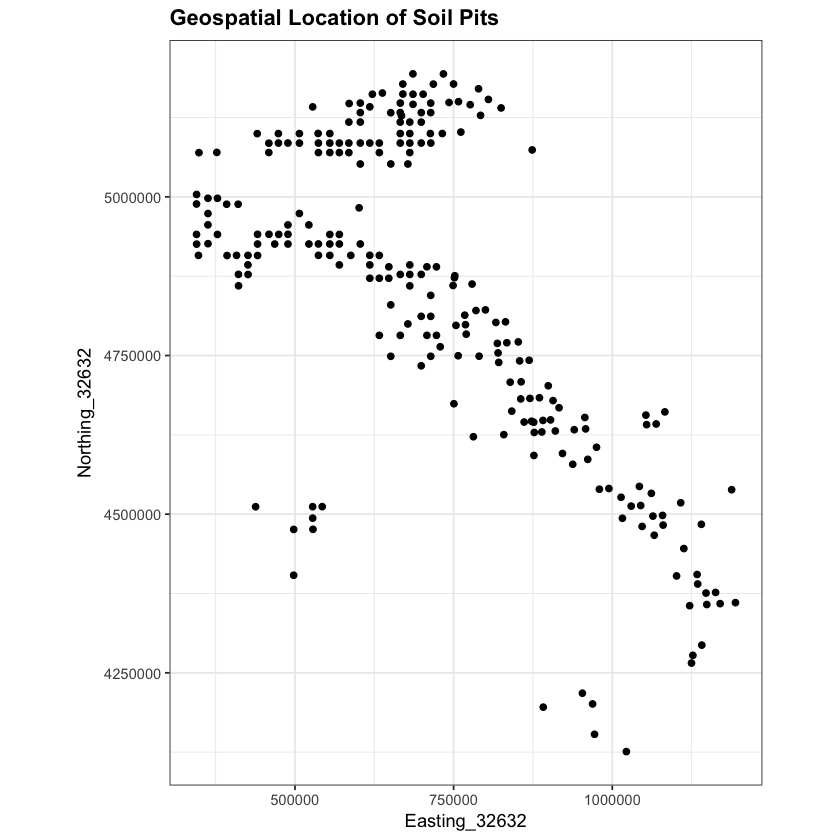

In [89]:
# see
#  http://stackoverflow.com/questions/41787313/how-to-create-a-grid-of-spatial-points
#  https://pakillo.github.io/R-GIS-tutorial/
it <- getData('GADM', country = 'IT', level = 1)
campania <- it[it$NAME_1 == "Campania",]
qplot(Easting_32632, Northing_32632, data=D) + coord_fixed(ratio = 1) + theme_bw() + ggtitle("Geospatial Location of Soil Pits") + theme(plot.title = element_text(lineheight=.8, face="bold"))

##### Sommario dei dati:

In [90]:
names(D)

[1] "depth"          "Stmax"          "Stavg"          "EndP"          
 [5] "MaxP"           "MaxV"           "RanV"           "RtUp"          
 [9] "RtDn"           "TINDVI"         "Easting_32632"  "Northing_32632"
[13] "elev"           "asp"            "slo"            "tri"           
[17] "Al05Fe"

In [91]:
summary(D[,c(1,17,13,14,15)])

     depth          Al05Fe             elev             asp        
 Min.   :0.05   Min.   :0.02651   Min.   :   6.0   Min.   :  0.00  
 1st Qu.:0.05   1st Qu.:0.19920   1st Qu.: 510.0   1st Qu.: 53.43  
 Median :0.05   Median :0.32450   Median : 819.0   Median :153.44  
 Mean   :0.05   Mean   :0.47369   Mean   : 895.7   Mean   :163.45  
 3rd Qu.:0.05   3rd Qu.:0.52023   3rd Qu.:1220.0   3rd Qu.:266.19  
 Max.   :0.05   Max.   :3.40963   Max.   :2500.0   Max.   :359.44  
      slo        
 Min.   :  0.00  
 1st Qu.: 22.36  
 Median : 37.39  
 Mean   : 40.15  
 3rd Qu.: 53.69  
 Max.   :113.58  

In [93]:
#cor( D[,17],D[,c(1,11:16)] ) # , na.rm = TRUE
cor( D[,17],D[,c(11:16)] ) # , na.rm = TRUE

Easting_32632,Northing_32632,elev,asp,slo,tri
0.3055835,-0.2185949,0.2066967,-0.08254545,0.1418778,0.1179391


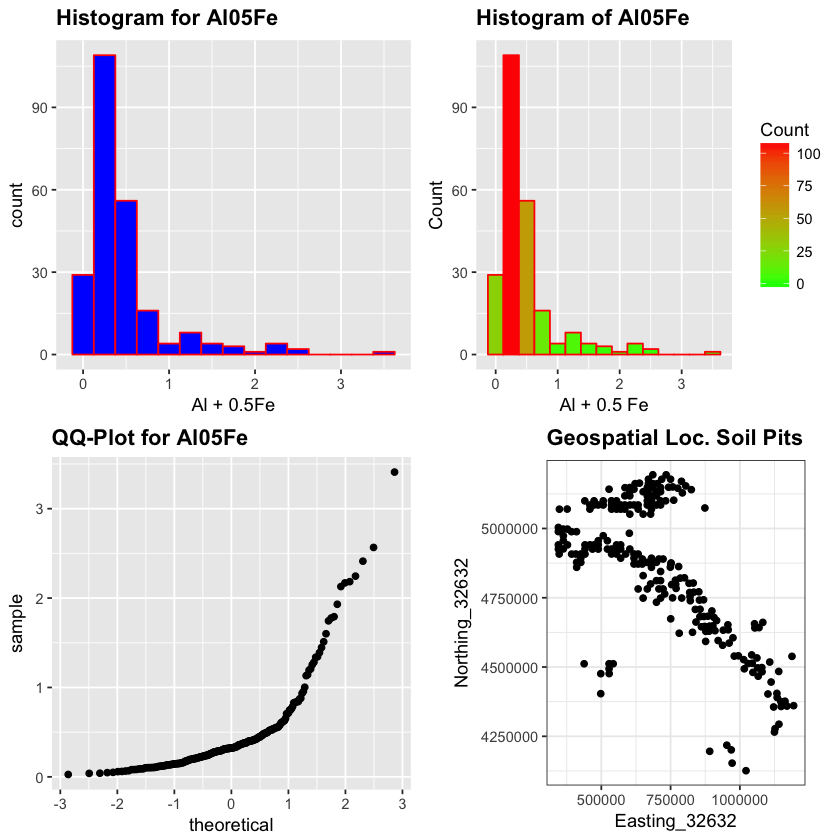

In [94]:
plt0 <- qplot(D$Al05Fe,geom="histogram",binwidth = 0.25,main = "Histogram for Al05Fe",fill=I("blue"),col=I("red"),xlab = "Al + 0.5Fe") + theme(plot.title = element_text(lineheight=.8, face="bold"))
plt1 <- ggplot(data=D,aes(D$Al05Fe)) + geom_histogram(binwidth = 0.25,col="red",aes(fill=..count..)) + scale_fill_gradient("Count", low = "green", high = "red") + ggtitle("Histogram of Al05Fe") + theme(plot.title = element_text(lineheight=.8, face="bold")) + labs(x="Al + 0.5 Fe", y="Count")
plt2 <- qplot(Easting_32632, Northing_32632, data=D) + coord_fixed(ratio = 1) + theme_bw() + ggtitle("Geospatial Loc. Soil Pits") + theme(plot.title = element_text(lineheight=.8, face="bold"))
plt3 <- ggplot(D, aes(sample=Al05Fe))+stat_qq() + ggtitle("QQ-Plot for Al05Fe") + theme(plot.title = element_text(lineheight=.8, face="bold"))
grid.arrange(plt0,plt1,plt3,plt2,ncol=2,nrow=2)

##### Alcune covariate: Elevatione, Slope & Aspect

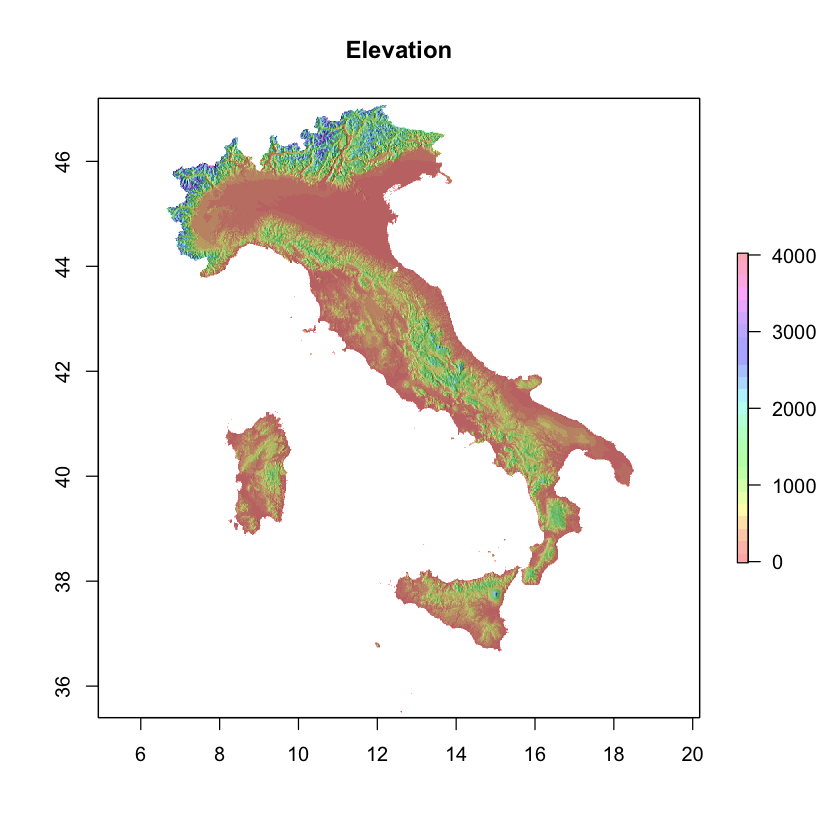

In [97]:
elevation <- getData("alt", country = "IT")
slope <- terrain(elevation, opt = "slope")
aspect <- terrain(elevation, opt = "aspect")
hill <- hillShade(slope, aspect, 40, 270)
plot(hill, col = grey(0:100/100), legend = FALSE, main = "Elevation")
plot(elevation, col = rainbow(25, alpha = 0.35), add = TRUE)
# to add points I have to set a ref system and change it equal to hill!
#plot(D$Easting_32632, D$Northing_32632, add = TRUE)# Some quick maps:

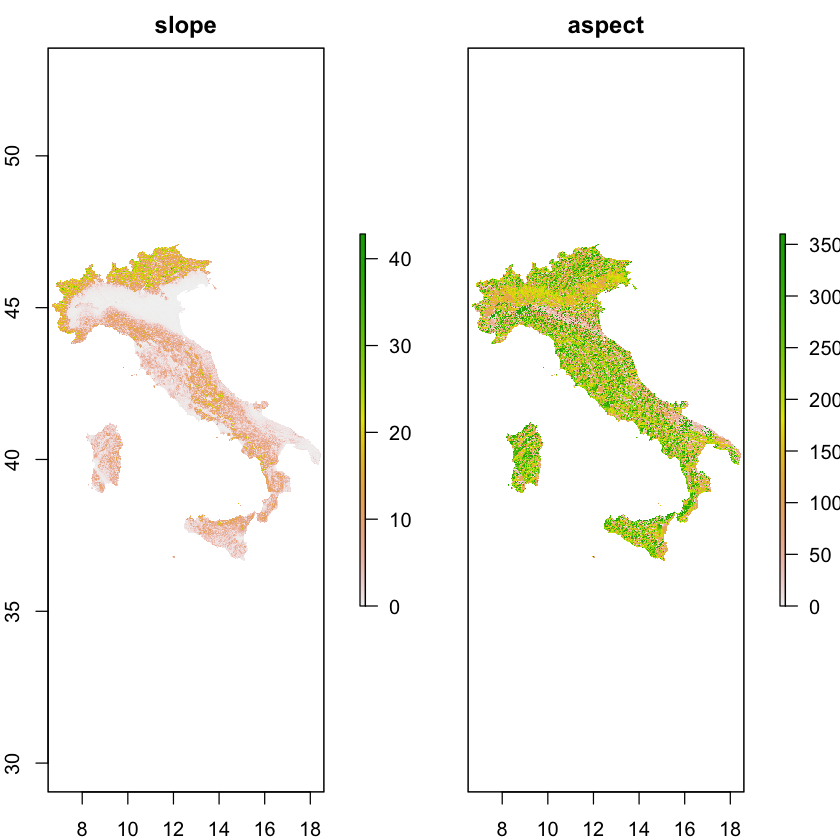

In [96]:
x <- terrain(elevation, opt = c("slope", "aspect"), unit = "degrees")
plot(x)

##### Andamento della variabile target (=andicità) rispetto ad alcune covariate:

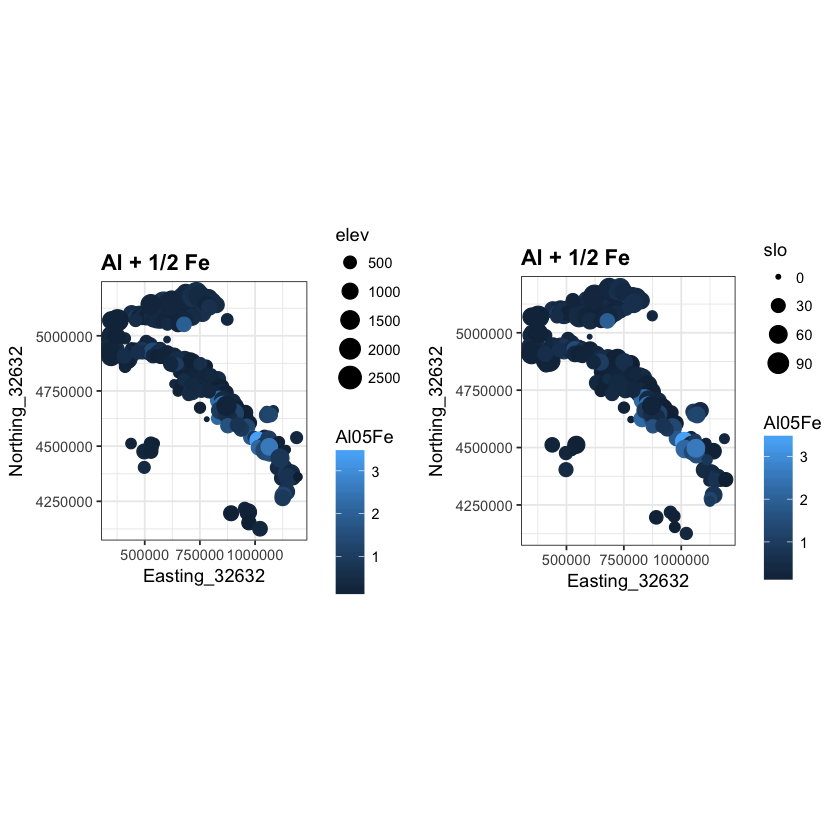

In [98]:
plt1 <- qplot(Easting_32632, Northing_32632, data=D, colour=Al05Fe, size=elev) + coord_fixed(ratio = 1) + theme_bw() + ggtitle("Al + 1/2 Fe") + theme(plot.title = element_text(lineheight=.8, face="bold"))
plt2 <- qplot(Easting_32632, Northing_32632, data=D, colour=Al05Fe, size=slo) + coord_fixed(ratio = 1) + theme_bw() + ggtitle("Al + 1/2 Fe") + theme(plot.title = element_text(lineheight=.8, face="bold"))
grid.arrange(plt1,plt2,ncol=2,nrow=1)
#qplot(Easting_32632, Northing_32632, data=D, colour=Al05Fe, size=elev) + coord_fixed(ratio = 1) + theme_bw() + ggtitle("Effect of elevation on (Al + 1/2 Fe)") + theme(plot.title = element_text(lineheight=.8, face="bold"))
#qplot(Easting_32632, Northing_32632, data=D, colour=Al05Fe, size=slo ) + coord_fixed(ratio = 1) + theme_bw() + ggtitle("Effect of slope on (Al + 1/2 Fe)") + theme(plot.title = element_text(lineheight=.8, face="bold"))

#### Configurazione del contesto geospaziale:

In [99]:
# data
Ds <- D
coordinates(Ds) = ~Easting_32632+Northing_32632

#### Variografia | raw

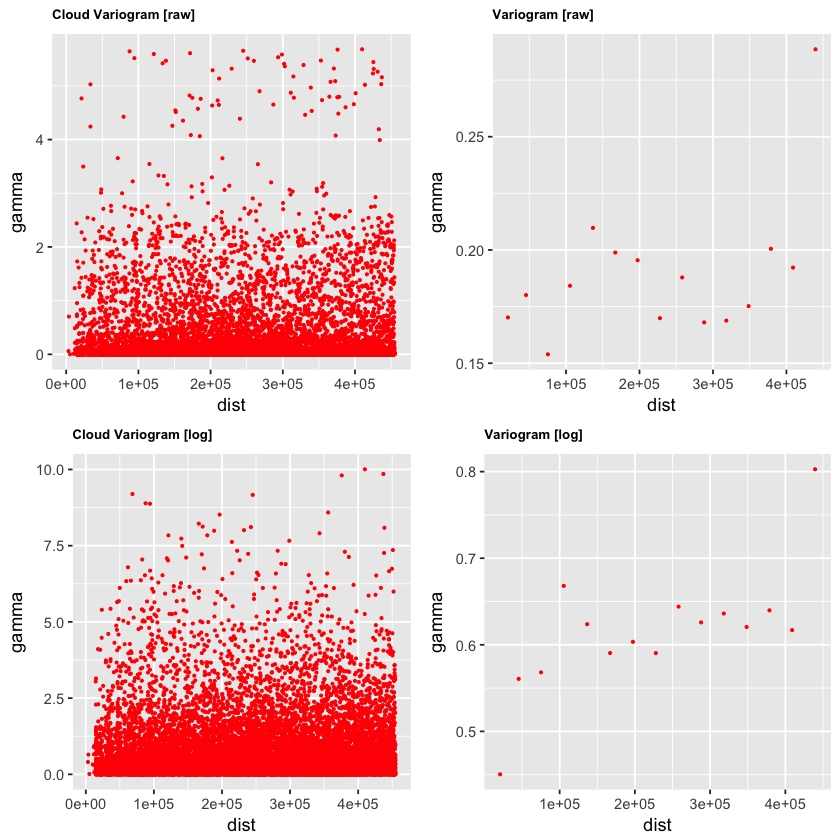

In [100]:
# <variogram cloud>
vgm.exp.raw.cloud = variogram( Al05Fe~1, Ds, cloud=TRUE )
vgm.exp.log.cloud = variogram( log(Al05Fe)~1, Ds, cloud=TRUE )
# <variogram>
vgm.exp.raw = variogram( Al05Fe~1, Ds )
vgm.exp.log = variogram( log(Al05Fe)~1, Ds )
# <variogram cloud | plot>
plt0 <- ggplot(data=vgm.exp.raw.cloud,aes(x=dist,y=gamma)) + geom_point(color='red',size=0.5) + ggtitle("Cloud Variogram [raw]") + theme(plot.title = element_text(size=8,lineheight=.8, face="bold"))
plt1 <- ggplot(data=vgm.exp.log.cloud,aes(x=dist,y=gamma)) + geom_point(color='red',size=0.5) + ggtitle("Cloud Variogram [log]") + theme(plot.title = element_text(size=8,lineheight=.8, face="bold"))
plt2 <- ggplot(data=vgm.exp.raw,aes(x=dist,y=gamma)) + geom_point(color='red',size=0.5) + ggtitle("Variogram [raw]") + theme(plot.title = element_text(size=8,lineheight=.8, face="bold"))
plt3 <- ggplot(data=vgm.exp.log,aes(x=dist,y=gamma)) + geom_point(color='red',size=0.5) + ggtitle("Variogram [log]") + theme(plot.title = element_text(size=8,lineheight=.8, face="bold"))
grid.arrange(plt0,plt2,plt1,plt3,ncol=2,nrow=2)

#### Rimozione delle coppie di punti caratterizzati da alta covarianza a corta distanza:

In [101]:
#   <D>
rm_D = 25000
rm_G = 2.5
short_dist 	<- vgm.exp.raw.cloud[which(vgm.exp.raw.cloud$dist<rm_D),]
high_gamma 	<- short_dist[which(short_dist$gamma>rm_G),]
high_gamma 	<- data.frame(high_gamma)
list_remove <- sort(unique( c(high_gamma$left,high_gamma$right) ))
rem.D <- length(list_remove)
if(length(list_remove)==0){
	D_rd <- D
}else{
	D_rd <- D[-list_remove,]
}
printf("Removed [D]: %d\n", rem.D)

Removed [D]: 3


#### Variografia | raw | after removal

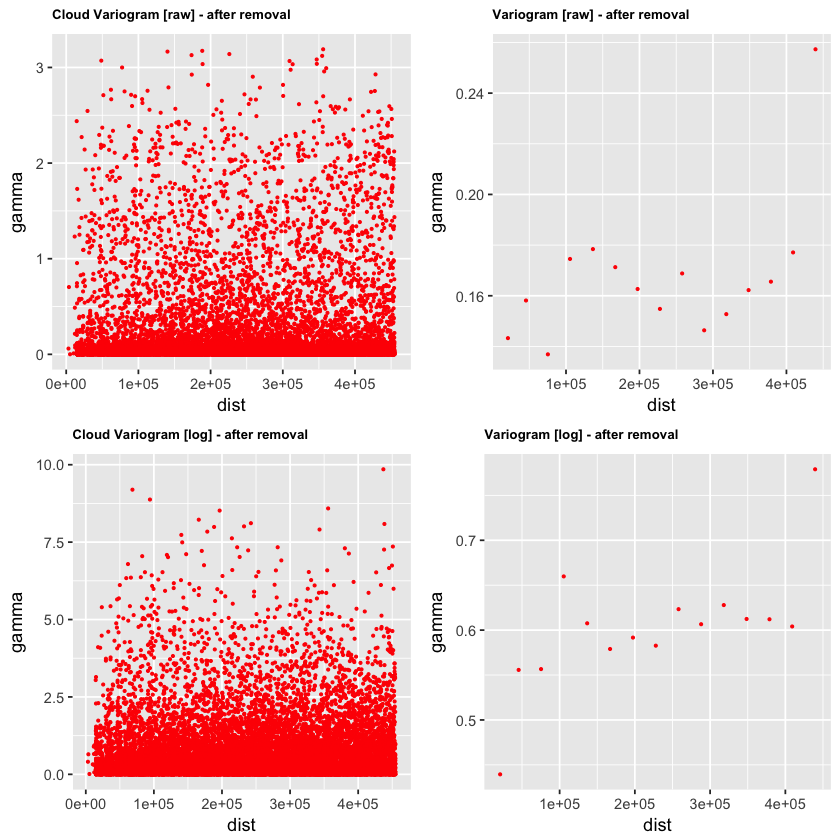

In [102]:
# data
D_rd_s <- D_rd
coordinates(D_rd_s) = ~Easting_32632+Northing_32632
# <variogram cloud>
vgm.exp.raw.cloud.rd = variogram( Al05Fe~1, D_rd_s, cloud=TRUE)
vgm.exp.log.cloud.rd = variogram( log(Al05Fe)~1, D_rd_s, cloud=TRUE)
# <variogram>
vgm.exp.raw.rd = variogram( Al05Fe~1, D_rd_s)# vgm( psill, model, range, nugget )
vgm.exp.log.rd = variogram( log(Al05Fe)~1, D_rd_s)# vgm( psill, model, range, nugget )
# <variogram cloud | plot>
plt1 <- ggplot(data=vgm.exp.raw.cloud.rd,aes(x=dist,y=gamma)) + geom_point(color='red',size=0.5) + ggtitle("Cloud Variogram [raw] - after removal") + theme(plot.title = element_text(size=8,lineheight=.8, face="bold"))
plt2 <- ggplot(data=vgm.exp.log.cloud.rd,aes(x=dist,y=gamma)) + geom_point(color='red',size=0.5) + ggtitle("Cloud Variogram [log] - after removal") + theme(plot.title = element_text(size=8,lineheight=.8, face="bold"))
plt3 <- ggplot(data=vgm.exp.raw.rd,aes(x=dist,y=gamma)) + geom_point(color='red',size=0.5) + ggtitle("Variogram [raw] - after removal") + theme(plot.title = element_text(size=8,lineheight=.8, face="bold"))
plt4 <- ggplot(data=vgm.exp.log.rd,aes(x=dist,y=gamma)) + geom_point(color='red',size=0.5) + ggtitle("Variogram [log] - after removal") + theme(plot.title = element_text(size=8,lineheight=.8, face="bold"))
grid.arrange(plt1,plt3,plt2,plt4,ncol=2,nrow=2)

#### Variografia :: Fitting | raw

In [113]:
psill 	= 0.27
range 	= 15000
nugget 	= 0.05
vgm.fit.raw = fit.variogram( vgm.exp.raw, model=vgm(psill,'Exp',range,nugget), fit.sills = TRUE,
                             fit.ranges = TRUE, fit.method = 7, debug.level = 1, warn.if.neg = TRUE )
plt0 <- plot(vgm.exp.raw,vgm.fit.raw,main='RAW')
vgm.fit.raw

model,psill,range,kappa,ang1,ang2,ang3,anis1,anis2
Nug,0.16882223,0.0,0.0,0,0,0,1,1
Exp,0.05975327,551150.5,0.5,0,0,0,1,1


#### Variografia :: Fitting | log

In [115]:
psill 	= 0.27
range 	= 20000
nugget 	= 0.05
vgm.fit.log = fit.variogram( vgm.exp.log, model=vgm(psill,'Exp',range,nugget), fit.sills = TRUE,
                             fit.ranges = TRUE, fit.method = 7, debug.level = 1, warn.if.neg = TRUE )
vgm.fit.log
plt1 <- plot(vgm.exp.log,vgm.fit.log,main='LOG')

model,psill,range,kappa,ang1,ang2,ang3,anis1,anis2
Nug,0.2487350,0.00,0.0,0,0,0,1,1
Exp,0.3759121,27114.34,0.5,0,0,0,1,1


#### Variografia :: Fitting | raw | after removal

In [116]:
psill 	= 0.27
range 	= 15000
nugget 	= 0.05
vgm.fit.raw.rd = fit.variogram( vgm.exp.raw.rd, model=vgm(psill,'Exp',range,nugget), fit.sills = TRUE,
                             fit.ranges = TRUE, fit.method = 7, debug.level = 1, warn.if.neg = TRUE )
plt2 <- plot(vgm.exp.raw,vgm.fit.raw,main='RAW | removal')
vgm.fit.raw.rd

model,psill,range,kappa,ang1,ang2,ang3,anis1,anis2
Nug,0.13532976,0.00,0.0,0,0,0,1,1
Exp,0.03362727,68637.78,0.5,0,0,0,1,1


#### Variografia :: Fitting | log | after removal

In [117]:
vgm.exp.log = variogram( log(Al05Fe)~1, Ds )

psill 	= 0.27
range 	= 20000
nugget 	= 0.05
vgm.fit.log.rd = fit.variogram( vgm.exp.log.rd, model=vgm(psill,'Exp',range,nugget), fit.sills = TRUE,
                             fit.ranges = TRUE, fit.method = 7, debug.level = 1, warn.if.neg = TRUE )
plt3 <- plot(vgm.exp.log.rd,vgm.fit.log.rd,main='LOG | removal')
vgm.fit.log.rd

model,psill,range,kappa,ang1,ang2,ang3,anis1,anis2
Nug,0.2001296,0.0,0.0,0,0,0,1,1
Exp,0.4097432,23795.8,0.5,0,0,0,1,1


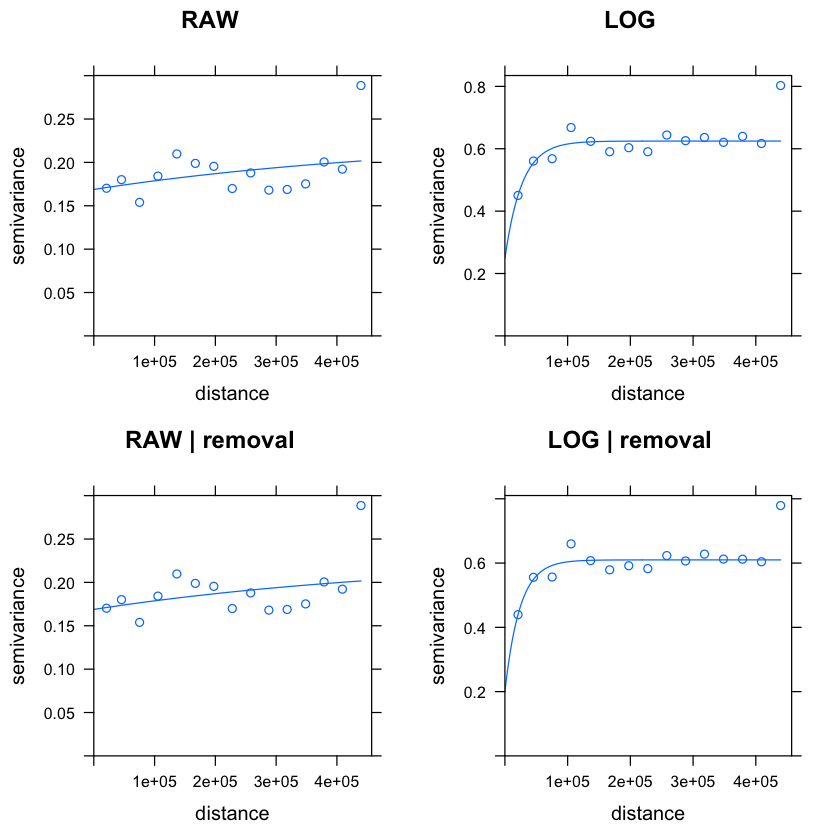

In [118]:
grid.arrange(plt0,plt1,plt2,plt3,ncol=2,nrow=2)

#### Predictions

##### Import grid data

In [119]:
#file.dtm <- '~/git/seminars/GeogrValutSuolo/dtm_1km_32.tif'
file.dtm <- '~/git/seminars/GeogrValutSuolo/dtm_3km_32.tif'
dtm <- raster(file.dtm)
grd <- as(dtm, 'SpatialGridDataFrame')
gridded(grd) = TRUE

Reference system: +proj=utm +zone=32 +datum=WGS84 +units=m +no_defs +ellps=WGS84 +towgs84=0,0,0
Pixel size [3000.000000m, 3000.000000m]


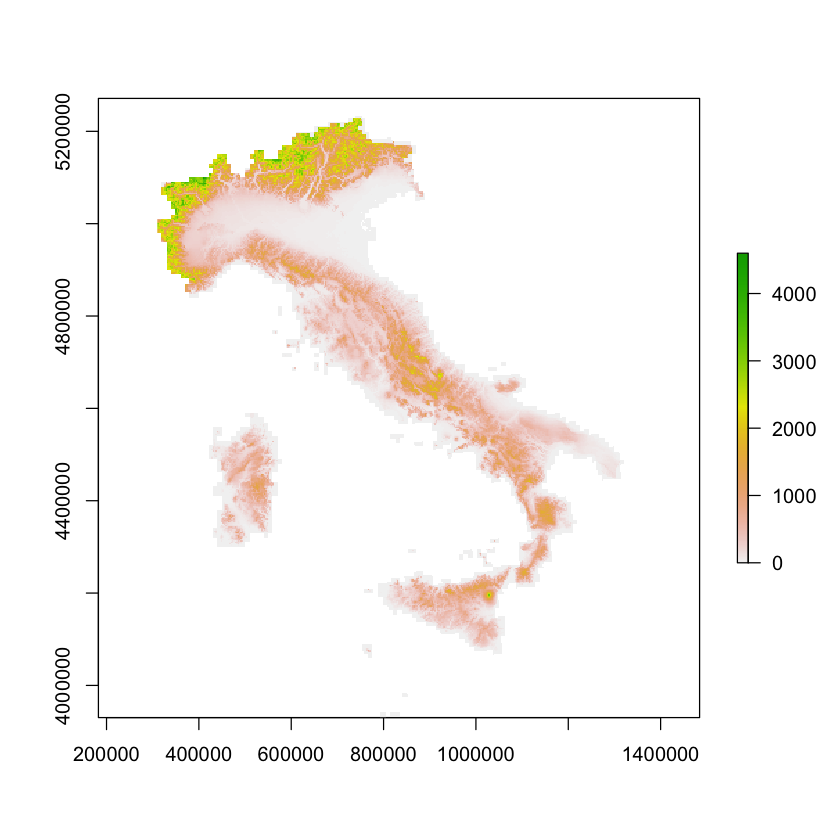

In [120]:
printf( "Reference system: %s\n",proj4string(dtm) )
printf( "Pixel size [%fm, %fm]\n", res(dtm)[1],res(dtm)[2] ) # x-y pixel size
plot(dtm)#,add=T) # add monitoring points

##### Assign projection to point data

Lista dei dataset presenti nel workspace:
<ul>
  <li> D      :: raw data,  </li> 
  <li> Ds     :: raw data with spatial reference frame,  </li> 
  <li> D_rd   :: data after removal, </li> 
  <li> D_rd_s :: data after removal with spatial reference frame. </li> 
</ul>

In [121]:
proj4string(Ds) <- CRS(proj4string(dtm))
proj4string(D_rd_s) <- CRS(proj4string(dtm))

##### Ordinary Kriging

R A W

In [122]:
krg.ok.raw = krige(Al05Fe~1, Ds, grd, model = vgm.fit.raw, nmax=20, nmin=5)#, maxdist=350)

[using ordinary kriging]


L O G

In [123]:
krg.ok.log = krige(log(Al05Fe)~1, Ds, grd, model = vgm.fit.log, nmax=20, nmin=5)#, maxdist=350)

[using ordinary kriging]


R A W | After Removal

In [124]:
krg.ok.raw.rd = krige(Al05Fe~1, D_rd_s, grd, model = vgm.fit.raw.rd, nmax=20, nmin=5)#, maxdist=350)

[using ordinary kriging]


L O G | After Removal

In [125]:
krg.ok.log.rd = krige(log(Al05Fe)~1, D_rd_s, grd, model = vgm.fit.log.rd, nmax=20, nmin=5)#, maxdist=350)

[using ordinary kriging]


#### Plot Predictions

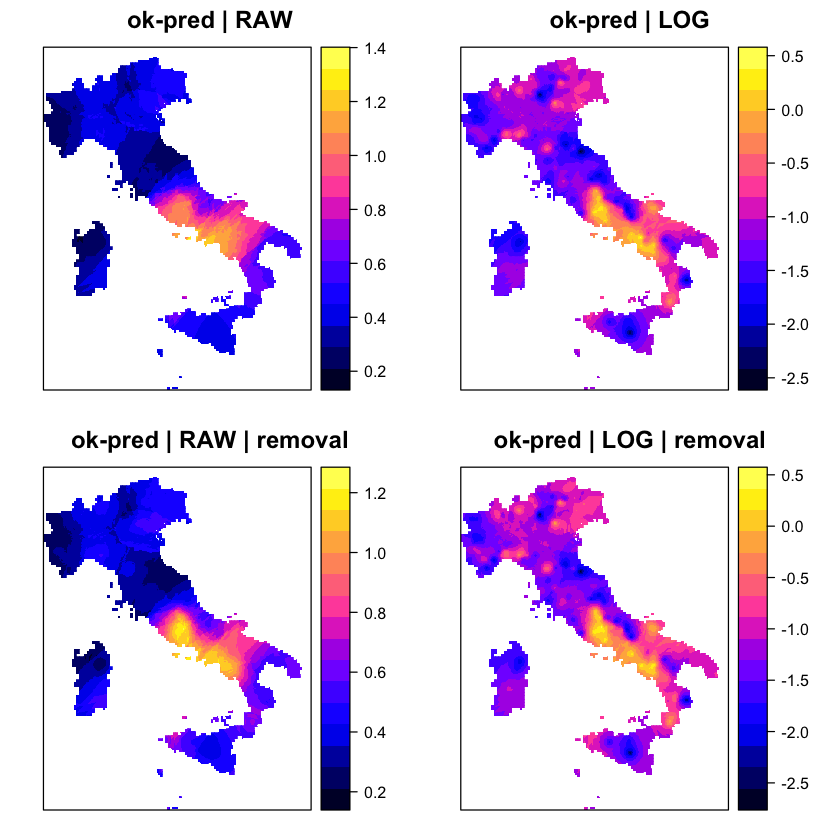

In [126]:
plt1 <- spplot(krg.ok.raw["var1.pred"],  main = "ok-pred | RAW") #paste(D1_rd$week,"ok global"))
plt2 <- spplot(krg.ok.log["var1.pred"],  main = "ok-pred | LOG")
plt3 <- spplot(krg.ok.raw.rd["var1.pred"],  main = "ok-pred | RAW | removal")
plt4 <- spplot(krg.ok.log.rd["var1.pred"],  main = "ok-pred | LOG | removal")
grid.arrange(plt1,plt2,plt3,plt4,ncol=2,nrow=2)

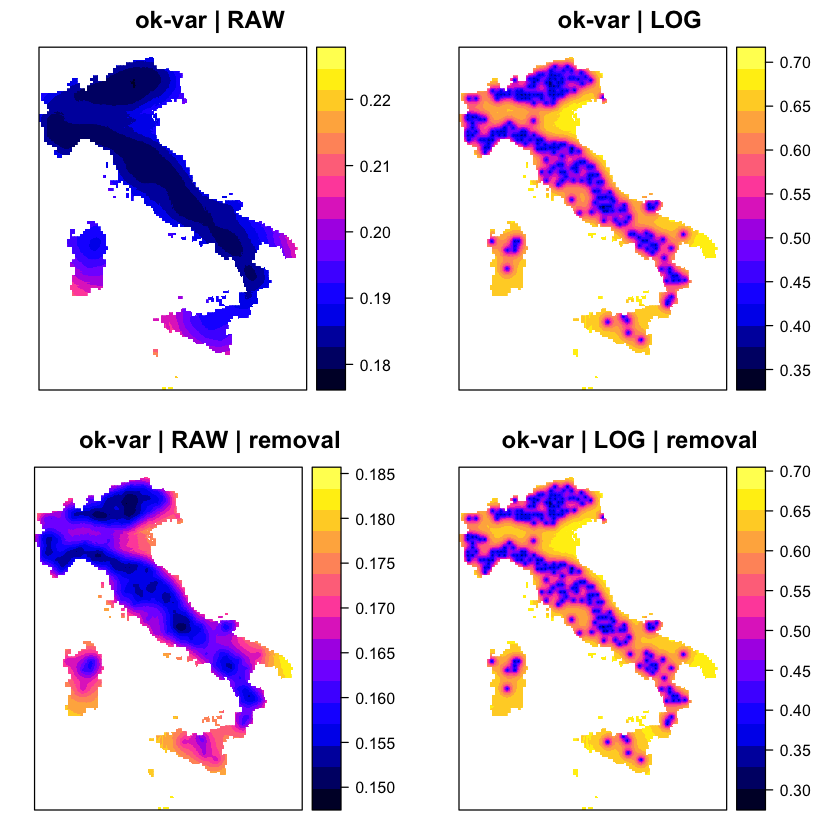

In [127]:
plt1 <- spplot(krg.ok.raw["var1.var"],  main = "ok-var | RAW") #paste(D1_rd$week,"ok global"))
plt2 <- spplot(krg.ok.log["var1.var"],  main = "ok-var | LOG")
plt3 <- spplot(krg.ok.raw.rd["var1.var"],  main = "ok-var | RAW | removal")
plt4 <- spplot(krg.ok.log.rd["var1.var"],  main = "ok-var | LOG | removal")
grid.arrange(plt1,plt2,plt3,plt4,ncol=2,nrow=2)

## NOTES { spatial variation in polygon vs raster soil map; multi-2D maps as ISRIC/World DSM; integrated 3-D maps==>spatial occurrence of soil horizons}